# Transformada Z inversa

Renato Naville Watanabe


## Preparação do ambiente

In [2]:
# @title
import numpy as np
import matplotlib.pyplot as plt

## Definição

Aqui vamos desenvolver um método para obter o sinal $x[n]$ a partir da sua transformada Z. Esse procedimento é conhecido como **Transformada Z Inversa**, denotada pelo operador $\mathcal{Z}^{-1}$.

$\mathcal{Z}^{-1}(X(z)) = x[n]$

A transformada Z inversa é definida como:

$$x[n] = \frac{1}{2\pi j}\oint X(z)z^{n-1}\,dz$$

Essa é uma integral de contorno no plano complexo. Felizmente, não precisaremos calcular essa integral. Nós usaremos os pares de sinais e transformadas já tabelados. Essa tabela é mostrada abaixo. Para sinais menos comuns, pode ser  necessário calcular essa integral. Se você estiver interessado nisso, pode procurar o livro de Brown e Churchill, listado nas referências, ou a disciplina *Funções de variáveis complexas* da UFABC.





Abaixo segue uma tabela com alguns sinais encontrados frequentemente na prática:

|$$\bf{x[n]}$$                        | $$\bf{X(z)}$$                                                          |
|-------------------------------------|------------------------------------------------------------------------|
|$\delta[n]$                          | 1                                                                      |
|$\delta[n-k]$                        | $z^{-n}$                                                               |
|$u[n]$                               | $\frac{z}{z-1}$                                                        |
|$u[n-k]$                             | $\frac{z^{-k}z}{z-1}$                                              |    
|$nu[n]$                              | $\frac{z}{(z-1)^2}$                                                    |
|$n^2u[n]$                            | $\frac{z(z-1)}{(z-1)^3}$                                               |
|$n^3u[n]$                            | $\frac{z(z^2+4z+1)}{(z-1)^4}$                                          |
|$\alpha^nu[n]$                       | $\frac{z}{z-\alpha}$                                                   |
|$\alpha^{n-1}u[n-1]$                 | $\frac{1}{z-\alpha}$                                                   |
|$n\alpha^nu[n]$                      | $\frac{\alpha z}{(z-\alpha)^2}$                                        |
|$\alpha^n\cos(\beta n)u[n]$, $\alpha>0$ |$\frac{z(z-\alpha\cos(\beta))}{z^2-2\alpha\cos(\beta)z +\alpha^2}$|
|$r\alpha^n\cos(\beta n+\theta)u[n]$, $\alpha>0$|$\frac{rz(z\cos(\theta-\theta)-\alpha\cos(\beta))}{z^2-2\alpha\cos(\beta)z +\alpha^2}$|

Anteriormente, já vimos que para $x[n] = \alpha^{n-1}u[n-1]$, a transformada Z é::

$X(z) = \frac{1}{z-a}$

Como estamos usando a transformada Z unilateral, a relação entre o sinal $x[n]$ e a sua transformada Z é única. Isso significa que se tivermos a transformada Z $X(z) = \frac{1}{z-a}$, conseguimos obter o sinal $x[n]$ que gerou auela transformada Z:

$x[n] = \alpha^{n-1}u[n-1]$



---

## Exemplo 1

Considerando $X(z) = \frac{1}{z+0,3}$

A sua transformada Z inversa é:

$x[n] = 0,3^{n-1}u[n-1]$

---

---

## Exemplo 2

Considerando $X(z) = \frac{z}{z-0,5}$

A sua transformada Z inversa é:

$x[n] = (-0,5)^nu[n]$


---

Porém ao tentar fazer a transformada inversa de transformadas Z como as mostradas abaixo, não conseguimos encontrar a sua transformada inversa diretamente.

$X_1(z) = \frac{z-3}{z^2 + 3z-3}$

$X_2(z) = \frac{z^2+0.2}{z^3 + 0.5z-1}$

$X_3(z) = \frac{z^2+0.2z+1}{z^4 +0.4z^3 - 0.3z^2-z}$

Estas transformadas Z não têm um correspondente direto na tabela. Então para conseguirmos achar o sinal que gerou essas transformadas Z precisamos reescrever a expressão de $X(z)$ em uma soma de expressões conhecidas. A maneira que iremos reescrever é a seguinte:

$$X(z) =  \frac{b_Mz^{-M} +...+b_2z^{-2}+b_1z^{-1} + b_0}{1 + a_{1}z^{-1}+...+a_Nz^{-N}} = A_0 + \frac{A_1}{z-p_1} + \frac{A_2}{z-p_2} + ... + \frac{A_N}{z-p_N}$$

em que $p_i$ são os polos de $X(z)$. O método que nos permite reescrever a expressão de $X(z)$ nesse formato é conhecido como **método das frações parciais**.

## Método das Frações Parciais

No método das frações parciais, primeiro reescrevemos a expressão de $X(z)$ no formato de polos e zeros.

$X(z) = \frac{b_Mz^{-M} +...+b_2z^{-2}+b_1z^{-1} + b_0}{1 + a_{1}z^{-1}+...+a_Nz^{-N}} = \frac{A(z-z_1)(z-z_2)...(z-z_M)}{(z-p_1)(z-p_2)...(z-p_N)}$

Queremos chegar no formato:

 $X(z) =  A_0 + \frac{A_1}{z-p_1} + \frac{A_2}{z-p_2} + ... + \frac{A_N}{z-p_N}$

### Caso em que $M<N$ com polos distintos

Vamos considerar primeiro o caso em que $M<N$. Nesse caso,

**1-** Então, igualamos as duas expressões:

$\frac{A(z-z_1)(z-z_2)...(z-z_M)}{(z-p_1)(z-p_2)...(z-p_N)}=A_0 + \frac{A_1}{z-p_1} + \frac{A_2}{z-p_2} + ... + \frac{A_N}{z-p_N}$

**2-** O que resta agora é encontrar os valores de $A_i$. Para isso, para cada $p_i$, multiplicamos os dois lados por $(z-p_i)$. Abaixo, para $p_1$.

$\frac{(z-p_1)A(z-z_1)(z-z_2)...(z-z_M)}{(z-p_1)(z-p_2)...(z-p_N)}=A_0(z-p_1) + \frac{A_1(z-p_1)}{z-p_1} + \frac{A_2(z-p_1)}{z-p_2} + ... + \frac{A_N(z-p_1)}{z-p_N}$

**3-** Perceba, que conseguimos cancelar os termos $(z-p_1)$ do lado esquerdo da igualdade e no termo sendo multiplicado por $A_1$.

$\frac{A(z-z_1)(z-z_2)...(z-z_M)}{(z-p_2)...(z-p_N)}=A_0(z-p_1) + A_1 + \frac{A_2(z-p_1)}{z-p_2} + ... + \frac{A_N(z-p_1)}{z-p_N}$

**4 -** Após isso, substituir $z$ pelo valor de $p_1$.

$\left.\frac{A(z-z_1)(z-z_2)...(z-z_M)}{(z-p_2)...(z-p_N)}\right|_{z=p_1} =\left.A_0(z-p_1)\right|_{z=p_1} + A_1 + \left.\frac{A_2(z-p_1)}{z-p_2}\right|_{z=p_1} + ... + \left.\frac{A_N(z-p_1)}{z-p_N}\right|_{z=p_1}$

**5-** Todos os termos do lado direito (com exceção do $A_1$) é zerado ao fazer essa substituição. Então, conseguimos encontrar o valor de $A_1$:

$A_1 = \frac{A(p_1-z_1)(z-z_2)...(p_1-z_M)}{(p_1-p_2)...(p_1-p_N)} $

**6-** Para encontrar o valor dos outros $A_i$, basta repetir os passos 2 até 5 para cada $p_i$. Para o caso de $M<N$, $A_0 = 0$.

**7-** Tendo encontrado todos os valores de $A_i$, agora é possível fazer a transformada Z inversa de cada termo.



---

#### Exemplo 3

Conideramos aqui a transformada $X(z)$ dada pela seguinte expressão:

$$X(z) = \frac{z^2-0.3z-0.1}{z^3+0.2z^2-0.11z-0.012}$$

$X(z)$ pode ser reescrito da seguinte forma, com seus polos e zeros sendo mostrados explicitamente:

$$X(z) = \frac{(z-0.5)(z+0.2)}{(z+0.1)(z+0.4)(z-0.3)}$$

São 3 polos. Então,fazemos:

$\frac{(z-0.5)(z+0.2)}{(z+0.1)(z+0.4)(z-0.3)} = \frac{A_1}{z+0.1} + \frac{A_2}{z+0.4} + \frac{A_3}{z-0.3}$

Começando o procedimeto por $(z+0.1)$:

$\frac{(z+0.1)(z-0.5)(z+0.2)}{(z+0.1)(z+0.4)(z-0.3)} = \frac{A_1(z+0.1)}{z+0.1} + \frac{A_2(z+0.1)}{z+0.4} + \frac{A_3(z+0.1)}{z-0.3} \rightarrow \frac{(z-0.5)(z+0.2)}{(z+0.4)(z-0.3)} = A_1 + \frac{A_2(z+0.1)}{z+0.4} + \frac{A_3(z+0.1)}{z-0.3} $

Substituindo $z$ por $-0.1$:

$A_1 = \frac{(-0.1-0.5)(-0.1+0.2)}{(-0.1+0.4)(-0.1-0.3)} = 0.5$

Multiplicando agora por $(z+0.4)$:

$\frac{(z+0.4)(z-0.5)(z+0.2)}{(z+0.1)(z+0.4)(z-0.3)} = \frac{A_1(z+0.4)}{z+0.1} + \frac{A_2(z+0.4)}{z+0.4} + \frac{A_3(z+0.4)}{z-0.3} \rightarrow \frac{(z-0.5)(z+0.2)}{(z+0.1)(z-0.3)} = \frac{A_1(z+0.4)}{z+0.1} + A_2 + \frac{A_3(z+0.4)}{z-0.3} $

Substituindo $z$ por $-0.4$:

$A_2 = \frac{(-0.4-0.5)(-0.4+0.2)}{(-0.4+0.1)(-0.4-0.3)}=0.86$

Por fim, multiplicando por $(z-0.3)$:

$\frac{(z-0.3)(z-0.5)(z+0.2)}{(z+0.1)(z+0.4)(z-0.3)} = \frac{A_1(z-0.3)}{z+0.1} + \frac{A_2(z-0.3)}{z+0.4} + \frac{A_3(z-0.3)}{z-0.3} \rightarrow \frac{(z-0.5)(z+0.2)}{(z+0.1)(z+0.4)} = \frac{A_1(z-0.3)}{z+0.1} + \frac{A_2(z-0.3)}{z+0.4} + A_3$

Substituindo $z$ por $0.3$:

$A_3 = \frac{(0.3-0.5)(0.3+0.2)}{(0.3+0.1)(0.3+0.4)}=-0.36$

Então, podemos reescrever $X(z)$ como:

$X(z) = \frac{0.5}{z+0.1} + \frac{0.86}{z+0.4} - \frac{0.36}{z-0.3}$

Com isso, é fácil fazer a transformada inversa de cada um dos termos e recuperar o sinal $x[n]$:

$x[n] = 0.5(-0.1)^{n-1}u[n-1] +  0.86(-0.4)^{n-1}u[n-1] - 0.36(0.3)^{n-1}u[n-1]$

---

---

#### Exemplo 4

Considere a seguinte transformada Z:

$X(z) = \frac{z+0.2}{z^3-0.5z^2+0.33z-0.029}$

$X(z)$ pode ser reescrito na forma de polos e zeros como:

$X(z) = \frac{z+0.2}{(z-0.1)(z-0.2 - j0.5)(z-0.2+j0.5)}$

Então temos que reescrever $X(z)$ como:

$\frac{z+0.2}{(z-0.1)(z-0.2 - j0.5)(z-0.2+j0.5)} = \frac{A_1}{z-0.1} + \frac{A_2}{z-0.2 - j0.5} + \frac{A_3}{z-0.2 + j0.5}$

Encontrando  o coeficiente $A_1$:

$A_1 = \left.\frac{z+0.2}{(z-0.2 - j0.5)(z-0.2+j0.5)}\right|_{z=0.1} = 1,15$

Agora, encontrando $A_2$:

$A_2 = \left.\frac{z+0.2}{(z-0.1)(z-0.2+j0.5)}\right|_{z=0.2+j0.5} = -0,58 - j1,12 = 1,26e^{-j2,05}$

e A_3:

$A_3 = \left.\frac{z+0.2}{(z-0.1)(z-0.2-j0.5)}\right|_{z=0.2-j0.5} = -0,58 + j1,12 = 1,26e^{j2,05}$

Repare que $A_3$ é o complexo conjugado de $A_2$. Isso sempre vai acontecer no caso de polos complexos.

Então, $X(z)$ é:

$X(z) = \frac{1,15}{z-0.1} + \frac{1,26e^{-j2,05}}{z-0.2 - j0.5} + \frac{1,26e^{j2,05}}{z-0.2 + j0.5}$

Então, a transformada Z inversa de $X(z)$ é:

$x[n] = 1,15(0.1)^{n-1}u[n-1] + 1,26e^{-j2,05}(0.2+j0.5)^{n-1}u[n-1] + 1,26e^{j2,05}(0.2-j0.5)^{n-1}u[n-1] = 1,15(0.1)^{n-1}u[n-1] + 1,26e^{-j2,05}(0,53e^{j1.19})^{n-1}u[n-1] + 1,26e^{j2,05}(0,53e^{-j1.19})^{n-1}u[n-1]$

Aqui, talvez você possa achar que calculou os polos de $X(z)$ errado, já que $x[n]$ é uma expressão complexa. Mas repare que é possível usar a fórmula de Euler para obtermos cossenos. Sempre que aparecerem polos complexos isso será possível:

$x[n] =  1,15(0.1)^{n-1}u[n-1] + 1,26(0,53)^{n-1}e^{j(1.19(n-1)-2,05)}u[n-1] + 1,26(0.53)^{n-1}e^{-j(1.19(n-1)-2,05)}u[n-1]$

Pela fórmula de Euler:

$x[n] =  1,15(0.1)^{n-1}u[n-1] + 0,63(0,53)^{n-1}\cos(1.19(n-1)-2,05)u[n-1] $




---

### Caso em que $M<N$ com polos repetidos

Aqui, vamos supor que um dos polos seja reptido $K$ vezes. Caso mais de um polo seja repetido, o procedimento é o mesmo. Com o polo $p_1$ repetido $K$ vezes, temos $X(z)$ escrito como:

$X(z) = \frac{b_Mz^{-M} +...+b_2z^{-2}+b_1z^{-1} + b_0}{1 + a_{1}z^{-1}+...+a_Nz^{-N}} = \frac{A(z-z_1)(z-z_2)...(z-z_M)}{(z-p_1)^K(z-p_{K+1})...(z-p_N)}$

Aqui, não seria possível expandir $X(z)$ da mesma forma, por causa das raízes repetidas. Então, a expansão é feita para a seguinte forma:

$X(z) = \frac{B_1}{z-p_1} + \frac{B_2}{(z-p_1)2} + ... + \frac{B_K}{(z-p_1)^K} + \frac{A_{K+1}}{z-p_{k+1}} + ... +  \frac{A_{M}}{z-p_{M}}$

Os coeficientes $A_i$, correspondentes aos polos não repetidos, são encontrados da mesma maneira que no caso anterior. Para encontrar os coeficientes $B_i$, fazemos o seguinte procedimento:

**1-** Multiplicamos as duas expressões por $(z-p_1)^K$ e cancelamos os termos que aparecem no numerador e denominador:

$\frac{A(z-z_1)(z-z_2)...(z-z_M)}{(z-p_{K+1})...(z-p_N)} = B_1(z-p_1)^{K-1} + B_2(z-p_1)^{K-2} + ... + B_K + \frac{A_{K+1}(z-p_1)^K}{z-p_{k+1}} + ... +  \frac{A_{M}(z-p_1)^K}{z-p_{M}}$

**2-** Substituindo $z$ por $p_1$, encontramos $B_K$:

$\left.\frac{A(z-z_1)(z-z_2)...(z-z_M)}{(z-p_{K+1})...(z-p_N)}\right|_{z=p_1} = \left.B_1(z-p_1)^{K-1}\right|_{z=p_1} + \left.B_2(z-p_1)^{K-2}\right|_{z=p_1} + ... + \left.B_K + \frac{A_{K+1}(z-p_1)^K}{z-p_{k+1}}\right|_{z=p_1} + ... +  \left.\frac{A_{M}(z-p_1)^K}{z-p_{M}}\right|_{z=p_1}$

$$B_K = \left.\frac{A(z-z_1)(z-z_2)...(z-z_M)}{(z-p_{K+1})...(z-p_N)}\right|_{z=p_1}$$

**3-** Para encontrar $B_{K-1}$, calculamos fazemos a derivada da expressão encontrada no passo 1.

$\frac{d}{dz}\left(\frac{A(z-z_1)(z-z_2)...(z-z_M)}{(z-p_{K+1})...(z-p_N)}\right) = \frac{d}{dz}\left(B_1(z-p_1)^{K-1}\right) + \frac{d}{dz}\left(B_2(z-p_1)^{K-2}\right) + ... + \frac{d}{dz}\left(B_{K-1}(z-p_1)\right) +\frac{d}{dz}\left(B_K\right) + \frac{d}{dz}\left(\frac{A_{K+1}(z-p_1)^K}{z-p_{k+1}}\right) + ... +  \frac{d}{dz}\left(\frac{A_{M}(z-p_1)^K}{z-p_{M}}\right)$

**4-** Isso faz com que o termo com $B_K$ desapareça e o termo $B_{K-1}$ fique sem estar multiplicando nada:

$\frac{d}{dz}\left(\frac{A(z-z_1)(z-z_2)...(z-z_M)}{(z-p_{K+1})...(z-p_N)}\right) = (K-1)B_1(z-p_1)^{K-2} + (K-2)B_2(z-p_1)^{K-3} + ... + B_{K-1} + \frac{d}{dz}\left(\frac{A_{K+1}(z-p_1)^K}{z-p_{k+1}}\right) + ... +  \frac{d}{dz}\left(\frac{A_{M}(z-p_1)^K}{z-p_{M}}\right)$

**5-** E fazemos de novo a substituição de z por $p_1$. Nessa etapa as derivadas com os coeficientes $A_i$ irão para zero:

$B_{K-1} = \left.\frac{d}{dz}\left(\frac{A(z-z_1)(z-z_2)...(z-z_M)}{(z-p_{K+1})...(z-p_N)}\right)\right|_{z=p_1}$

**6-** Para encontrar os $B_i$ restantes, basta continuar derivando a expressão encontrada no passo 1 e substituir $z$ por $p_1$.

---

#### Exemplo 5

Vamos considerar a seguinte transformada Z:

$X(z) = \frac{(z-0.5)(z+0.3)}{(z+0.5)^2(z+0.1)}$

Para encontrar a sua transformada Z inversa, primeiro vamos expandir em frações parciais:

$X(z) = \frac{A_1}{z+0.1} + \frac{B_1}{z+0.5} + \frac{B_2}{(z+0.5)^2}$

Primeiro, encontrando $A_1$:

$A_1 = \frac{(-0.1-0.5)(-0.1+0.3)}{(-0.1+0.5)^2} = -0.75$

Agora, $B_2$

$B_2 = \left.\frac{(z-0.5)(z+0.3)}{z+0.1}\right|_{z=_-0.5} = -0.5$

E para achar $B_1$:

$\left.\frac{d}{dz}\left(\frac{(z-0.5)(z+0.3)}{z+0.1} \right)\right|_{z=-0.5} = B_1$

$B_1 = \left.\frac{(2z-0.2)(z+0.1)-(z^2-0.2z-0.15)}{(z+0.1)^2}\right|_{z=-0.5} = 1.75$

Então, $X(z)$ pode ser escrito da seguinte forma:

$X(z) = \frac{-0.75}{z+0.1} + \frac{1.75}{z+0.5} - \frac{0.5}{(z+0.5)^2}$

Então, a transformada inversa é:

$x[n] = -0.75(-0.1)^{n-1}u[n-1] + 1.75(-0.5)^{n-1}u[n-1] + (n-1)(-0.5)^{n-1}u[n-1]$

---

### Caso com $M = N$

Caso o número de zeros seja igual o número de polos, antes de realizarmos o procedimento mostrado anteriormente, fazemos:

$X(z) = \frac{AN(z)}{D(z)} = A\frac{D(z) + N(z) - D(z)}{D(z)} = A + A\frac{N(z)-D(z)}{D(z)}$. Isso vai fazer com que o numerador fique com pelo menos um zero a menos. Após esse procedimento, é possível aplicar o método de frações parciais.

---

#### Exemplo 6

Considere a seguinte transformada Z:

$X(z) = \frac{z^2+0.3z+0.02}{z^2+0.1z-0.56}$

Então, antes de iniciarmos o procedimento visto anteriormente, fazemos:

$X(z) = 1 +  \frac{z^2+0.3z+0.02 - (z^2+0.1z-0.56)}{z^2+0.1z-0.56} = 1 + \frac{0.3z+0.58}{z^2+0.1z-0.56}$

Agora, podemos expandir em frações parciais:

$X(z) = 1 + \frac{0.3z+0.58}{(z+0.8)(z-0.7)} = 1 + \frac{A_1}{z+0.8} + \frac{A_2}{z-0.7}$

Encontrando os coeficientes $A_1$ e $A_2$:

$A_1 = \left.\frac{0.3z+0.58}{(z-0.7)}\right|_{z=-0.8} = -0.23$

$A_2 = \left.\frac{0.3z+0.58}{(z+0.8)}\right|_{z=0.7}=0.53$


Então:

$x[n] = \delta[n] -0.23(-0.8)^{n-1}u[n-1] + 0.53(0.7)^{n-1}u[n-1]$

---


## Método das frações parciais modificado

O método mostrado a seguir é mais conveniente de ser utilizado com a transformada Z. Você deve ter reparado que nos exemplos anteriores, o método das frações parciais resultou em sinais multiplicados por $u[n-1]$. Isso muitas vezes é inconveniente. O ideal seria termos sinais que comecem em $n=0$, ou seja, que sejam multiplicados por $u[n]$. Para isso, antes de realizar a expansão em frações parciais, fazemos:

$X'(z) = \frac{X(z)}{z}$

Após isso, realizamos a expansão em frações parciais como mostrado acima. Ao final multiplicamos $X'(z)$ expandido em frações parciais por $z$ para obtermos $X(z)$ novamente.


---

#### Exemplo 7

Consideramos aqui a mesma transformada Z do exemplo 3:


$X(z) = \frac{z^2-0.3z-0.1}{z^3+0.2z^2-0.11z-0.012}=\frac{(z-0.5)(z+0.2)}{(z+0.1)(z+0.4)(z-0.3)}$

Agora, obtemos $X'(z)$:

$X'(z)=\frac{X(z)}{z} = \frac{(z-0.5)(z+0.2)}{z(z+0.1)(z+0.4)(z-0.3)}$

Agora, fazemos a expansão em frações parciais:

$X'(z) = \frac{(z-0.5)(z+0.2)}{z(z+0.1)(z+0.4)(z-0.3)} = \frac{A_1}{z} + \frac{A_2}{z+0.1} + \frac{A_3}{z+0.4} + \frac{A_4}{z-0.3}$

E obtemos os coeficientes:


$A_1 = \left.\frac{(z-0.5)(z+0.2)}{(z+0.1)(z+0.4)(z-0.3)}\right|_{z=0} = 8,33$

$A_2 = \left.\frac{(z-0.5)(z+0.2)}{z(z+0.4)(z-0.3)}\right|_{z=-0.1} = -5$

$A_3 = \left.\frac{(z-0.5)(z+0.2)}{z(z+0.1)(z-0.3)}\right|_{z=-0.4} = -2.14$

$A_4 = \left.\frac{(z-0.5)(z+0.2)}{z(z+0.1)(z+0.4)}\right|_{z=0.3} = -1.19$

Então $X'(z)$ é:


$X'(z) = \frac{8,33}{z} - \frac{5}{z+0.1} - \frac{2.14}{z+0.4} - \frac{1.19}{z-0.3}$

Agora, para obtermos $X(z)$ de volta, multiplicamos por $z$:

$X(z) = 8.33 - \frac{5z}{z+0.1} - \frac{2.14z}{z+0.4} - \frac{1.19z}{z-0.3}$

Então, $x[n]$ é:

$x[n] = 8.33\delta[n] - 5(-0.1)^nu[n] - 2.14(-0.4)^nu[n] - 1.19(0.3)^nu[n]$

A expressão encontrada é diferente da encontrada no Exemplo 3, mas seus gráficos são idênticos:






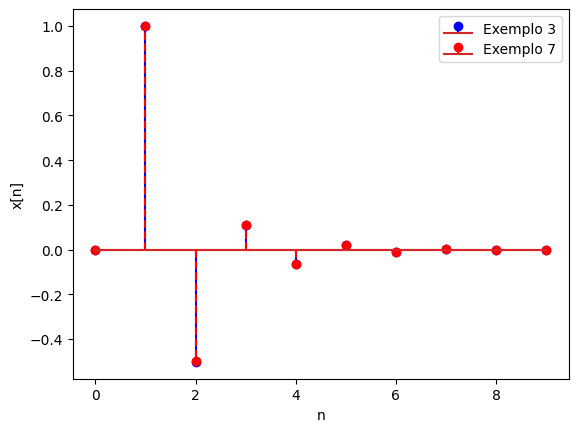

In [3]:
# @title
def step(n):
    u = np.zeros_like(n)
    u[n>=0] = 1
    return u

def delta(n):
    d = np.zeros_like(n)
    d[n==0] = 1
    return d

n = np.arange(10)
x3 = 0.5*(-0.1)**(n-1)*step(n-1) +  0.86*(-0.4)**(n-1)*step(n-1) - 0.36*(0.3)**(n-1)*step(n-1)
x7 = 8.33*delta(n) -  5*(-0.1)**n*step(n) - 2.14*(-0.4)**n*step(n) - 1.19*(0.3)**n*step(n)

plt.figure()
plt.stem(n, x3, linefmt='b-')
plt.stem(n, x7, linefmt='r--')
plt.legend(['Exemplo 3', 'Exemplo 7'])
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

## Usando recursos computacionais

Realizar a expansão em frações parciais pode ser bastante trabalhoso. Hoje em dia, as linguagens usadas em computação científica têm maneiras para realizar essa expansão de forma simples. A biblioteca Scipy do Python tem a função `residue`.

Basta colocar os coeficientes do numerador em uma variável, do denominador em outra variável e chamar a função residue. Chamando a função para a mesma transformada Z do exemplo 7 (para $Y'(z)$):

In [7]:
from scipy.signal import residue
num = [1, -0.3, -0.1]
den = [1, 0.2, -0.11, -0.012,0]
A, polos, r = residue(num, den)
print(f'A={A}, polos={polos}, r={r}')

A=[ 8.33333333 -5.         -1.19047619 -2.14285714], polos=[ 0.  -0.1  0.3 -0.4], r=[]


A função retorna 3 arrays (listas de números):

- A primeira lista tem os valores de $A_i$.

- A segunda a lista com os polos, na mesma ordem da lista anterior.

- A terceira lista com os valores que não correspondem a nenhum polo.

  Então, nesse caso a expansão fica:

  $X'(z) = \frac{8,33}{z} - \frac{5}{z+0.1} - \frac{1,19}{z-0.3}- \frac{2,14}{z+0.4}$

  Que é o mesmo resultado encontrado no exemplo 7.

Outras linguagens, como Matlab, Julia e R, têm funções semelhantes.

---

## Exemplo 8

Vamos fazer a expansão em frações parciais de:

$X(z) = \frac{z^3-0.1z^2-0.17z-0.015}{z^4+1.3z^3+0.57z^2+0.095z+0.005}$

Encontrando $X'(z)=\frac{X(z)}{z}$:

$X'(z) = \frac{z^3-0.1z^2-0.17z-0.015}{z^5+1.3z^4+0.57z^3+0.095z^2+0.005z}$


In [8]:
num = [1, -0.1, -0.17,-0.015]
den = [1, 1.3,0.57,0.095, 0.005, 0]

A, polos, r = residue(num, den)
print(f'A={A}, polos={polos}, r={r}')

A=[-3.00000000e+00  6.50521303e-15  3.88888889e+00 -8.88888889e-01
  1.33333333e+00], polos=[ 0.  -0.1 -0.2 -0.5 -0.5], r=[]


Perceba que a lista de polos deu dois polos repetidos. Nesse caso o segundo vai ser elevado ao quadrado.

Então, a expansão em frações parciais de $X'(z)$ é:

$X'(z) = -\frac{3}{z} + \frac{4,33.10^{-15}}{z+0.1} + \frac{3.89}{z+0.2} - \frac{8,9}{z+0.5} + \frac{1,33}{(z+0,5)^2}$

Obtendo de volta $X(z) = zX'(z)$:

$X(z) = -3 + \frac{6,5.10^{-15}z}{z+0.1} + \frac{3.89z}{z+0.2} - \frac{0,89z}{z+0.5} + \frac{1,33z}{(z+0,5)^2}$

O sinal que originou essa transformada de Laplace é:

$x[n] = -3\delta[n]+6,5.10^{-15}(-0,2)^nu[n] - 0,89(-0,5)^nu[n]+2,66n(-0,5)^nu[n]$

---

## Exercícios

**1)** Calcule as transformadas Z inversas. Dê preferência para expressões começando de $n=0$.


a) $X_1(z) = \frac{z-1}{z+5}$

b) $X_2(z) = \frac{z^2+3}{z^2 +2z + 3}$

c) $X_3(z) = \frac{z^2-z}{z^2+3z-2}$

d) $X_4(z) = \frac{z(z-3)}{z^2-4z+5}$

**2)**  Calcule as transformadas Z inversas. Dê preferência para expressões começando de $n=0$.

a) $X_1(z) = \frac{z+1}{3z}$

b) $X_2(z) = \frac{z(e^{-3}-2)}{(z-e^{-3})(z-2)}$

c) $X_3(z) = \frac{z^2(-2z^2+9z-4)}{(z-1)(z-3)^2}$

d) $X_4(z) = \frac{2z^2 - 0,3z + 0,25}{z^2+0,6z}$

## Referências

- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007
- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010
- Stewart, James. Cálculo - Volume 2, 2017
- Brown, James, e Ruel Churchill. Variáveis complexas e aplicações. (9ª edição), 2015.

## Solução dos exercícios